# Plots of Dimension reduction on Wikipedia data

First we load the libraries and data ... I have saved off the dimension reduction results of the various algorithms.

In [1]:
import datamapplot
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use("mpl_style.txt")
import matplotlib.pyplot as plt

plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

plt.rcParams['savefig.bbox'] = 'tight'

wikipedia_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_umap_data_map_1.npy")
wikipedia_labels = np.load("../data/Simple-English-Wikipedia/Wikipedia-cluster_labels.npy", allow_pickle=True)
wikipedia_labels_2 = np.load("../data/Simple-English-Wikipedia/wikipedia_azureai_topic_layer_2.npy", allow_pickle=True)

tsne_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_tsne_data_map_1.npy")
pca_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_pca_data_map_1.npy")
mds_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_mds_data_map_1.npy")
le_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_le_data_map_1.npy")
phate_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_phate_data_map_1.npy")

Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

In [2]:
import pkg_resources
print(pkg_resources.get_distribution('datamapplot').version)


0.5.1


We want a consistent palette; here we are essentially reusing internal code in datamapplot to make a palette based on the UMAP embedding.

In [3]:
unique_non_noise_labels = [
    label for label in np.unique(wikipedia_labels) if label != "Unlabelled"
]
cluster_centers = np.asarray([
    wikipedia_data_map[wikipedia_labels == label].mean(axis=0)
    for label in unique_non_noise_labels
])
palette = datamapplot.palette_handling.palette_from_datamap(
    wikipedia_data_map,
    cluster_centers,
    hue_shift=0.0,
    radius_weight_power=1.0,
    min_lightness=15,
)
label_color_map = dict(zip(unique_non_noise_labels, palette))

label_color_map['Unlabelled'] = "#d9d9d9"

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_93652/3069621193.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10",alpha=.01)


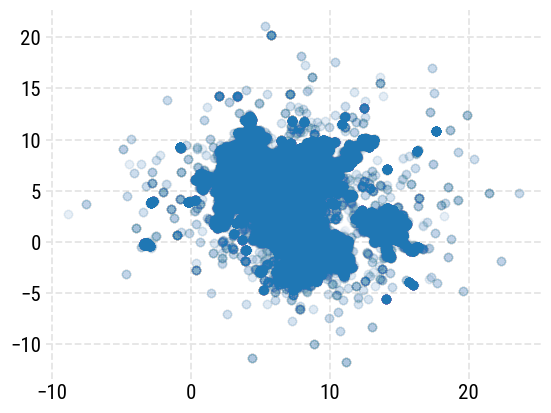

In [4]:
plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10",alpha=.01)

In [5]:
# Calculate mean point to rotate around
center = np.mean(wikipedia_data_map, axis=0)

# Convert 45 percent to radians (45% of 360 degrees = 162 degrees)
theta = np.radians(110)

# Create rotation matrix
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Center the points, rotate, then uncenter
centered_points = wikipedia_data_map - center
rotated_points = np.dot(centered_points, rotation_matrix.T) 
rotated_wikipedia_data_map = rotated_points + center


/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_93652/3413238709.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rotated_wikipedia_data_map[:,0], rotated_wikipedia_data_map[:,1], cmap="tab10",alpha=.01)


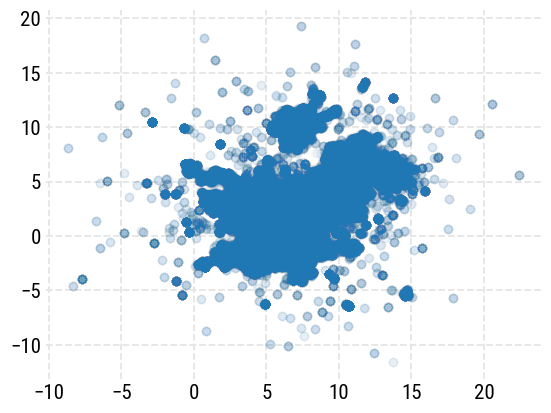

In [6]:
plt.scatter(rotated_wikipedia_data_map[:,0], rotated_wikipedia_data_map[:,1], cmap="tab10",alpha=.01)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment
Min fontsize: 4.0
Max fontsize: 11.479125600000003


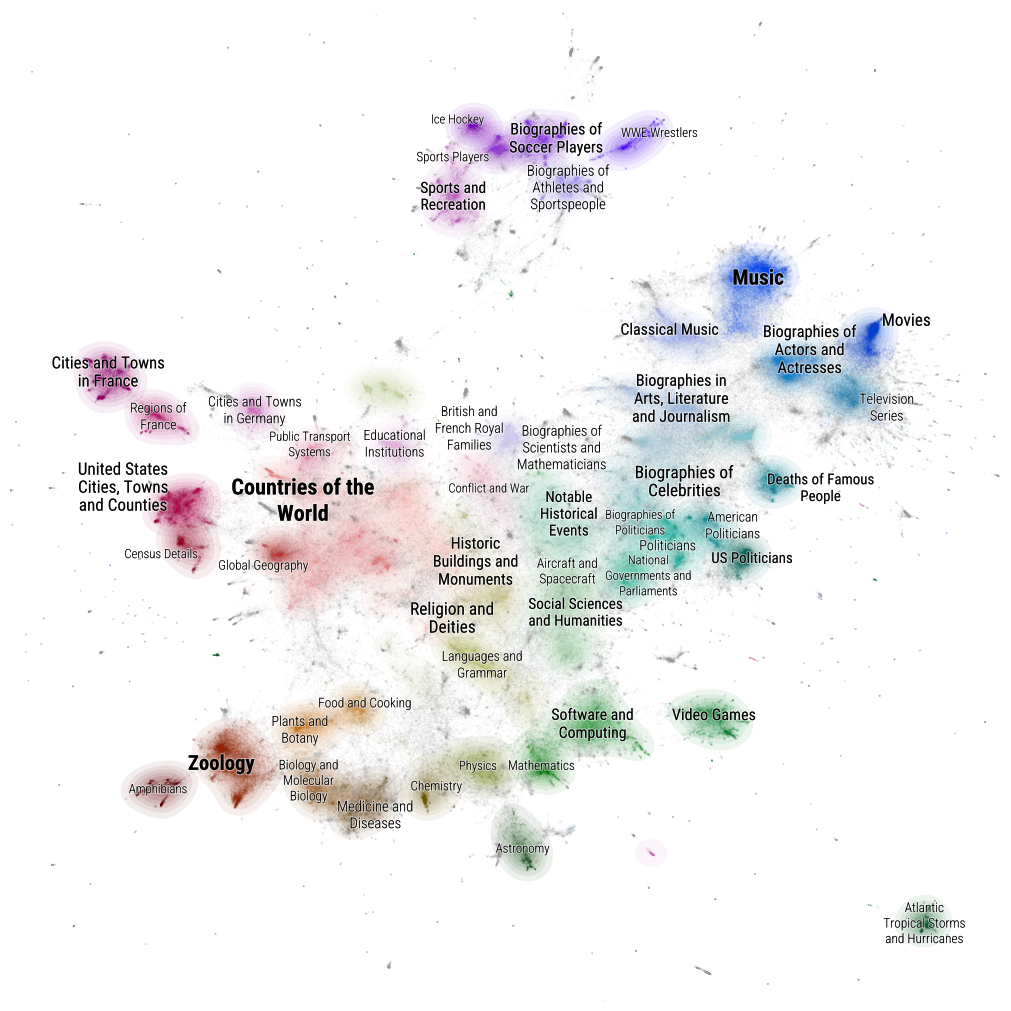

In [7]:
fig, ax = datamapplot.create_plot(
    rotated_wikipedia_data_map.astype(np.float32),
    wikipedia_labels,
    use_medoids=True,
    font_family="Roboto Condensed",
    point_size=1.3,
    label_linespacing=1.25,

    color_label_text=False,
    force_matplotlib=True,

    label_over_points=True,
    dynamic_label_size=True,
    # min_fontsize=8, # These somehow dont work for me?
    # max_font_size=100,
    label_font_stroke_width=1.5 
)

# Print min and max of current font sizes
font_sizes = [txt.get_fontsize() for txt in ax.texts]
print("Min fontsize:", min(font_sizes))
print("Max fontsize:", max(font_sizes))

# Rescale font sizes to a new range, e.g., 5-10
min_new, max_new = 9, 16
min_old, max_old = min(font_sizes), max(font_sizes)
for txt in ax.texts:
    old_size = txt.get_fontsize()
    # Avoid division by zero if all font sizes are the same
    if max_old > min_old:
        new_size = min_new + (old_size - min_old) * (max_new - min_new) / (max_old - min_old)
    else:
        new_size = (min_new + max_new) / 2
    txt.set_fontsize(new_size)
# set axis limits to the data bounds 
# Not sure whether we want this, we are cutting off a hand full of noise points by zooming in.
ax.set_xlim(-2,16)
ax.set_ylim(-7,14)
fig.set_frameon(False)
fig.savefig("../figures/umap_pca-init_wikipedia_map.jpg", dpi=400, facecolor="white")

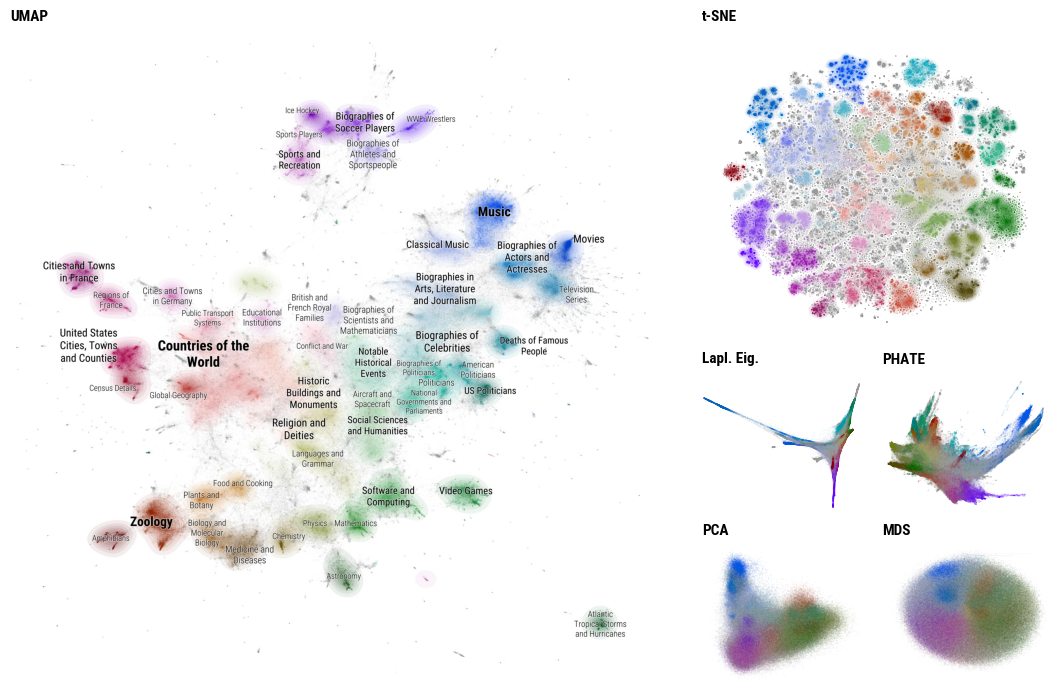

In [ ]:


fig, ax_dict = plt.subplot_mosaic(
'''
AAAABB
AAAABB
AAAACD
AAAAEF
''',
figsize=(11,7),
dpi=100,
)
# Replace UMAP plot with the static image
img = plt.imread("../figures/umap_pca-init_wikipedia_map.jpg")
ax_dict["A"].imshow(img)
ax_dict["A"].axis("off")
ax_dict["A"].set_title("UMAP", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["B"].set_title("t-SNE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["D"].set_title("PHATE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["C"].set_title("Lapl. Eig.", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["E"].set_title("PCA", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["F"].set_title("MDS", fontfamily="Roboto Condensed", fontsize=11, pad=10)

# Create a modified label_color_map with alpha for grey colors
modified_label_color_map = label_color_map.copy()
for key, color in modified_label_color_map.items():
    # Check if color is grey-ish (all RGB values are close to each other)
    if isinstance(color, (list, tuple)) and len(color) >= 3:
        r, g, b = color[0], color[1], color[2]
        # If it's a grey color (all channels roughly equal), add alpha
        if abs(r - g) < 0.1 and abs(r - b) < 0.1 and abs(g - b) < 0.1:
            if len(color) == 3:
                modified_label_color_map[key] = [r, g, b, 0.5]
            else:
                modified_label_color_map[key] = [r, g, b, 0.5]

fig_, ax = datamapplot.create_plot(
    tsne_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="t-SNE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":16},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":2.5},
    label_color_map=modified_label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["B"],
)
fig_, ax = datamapplot.create_plot(
    le_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Laplacian Eigenmaps",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-6},
    label_color_map=modified_label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["C"],
)
fig_, ax = datamapplot.create_plot(
    2000 * phate_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="PHATE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":0.3},
    label_color_map=modified_label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["D"],
)
fig_, ax = datamapplot.create_plot(
    pca_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Principal Component Analysis",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=modified_label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["E"],
)
fig_, ax = datamapplot.create_plot(
    mds_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Multidimensional Scaling",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=modified_label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["F"],
)
plt.axis("equal")
plt.tight_layout()
fig.savefig("../figures/wikipedia_figure.jpg", dpi=400, facecolor="white")
fig.savefig("../figures/wikipedia_figure.png", dpi=400, facecolor="white")